In [6]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_dataset(url: str) -> pd.DataFrame:
    response = requests.get(url)
    if response.status_code == 200:
        if url.endswith('.json'):
            data = response.json()['campos']
        return pd.DataFrame(data)
    else:
        print('Request to provided URL failed!')
    return None

In [10]:
sample = r'https://dados.pe.gov.br/dataset/7bbfeed7-3019-4c6a-bee7-e1b7411f616b/resource/68cb38cf-bae8-49d8-a30b-6cf48338ada7/download/2022_12_remuneracao_ativos.json'
df = get_dataset(sample)

In [11]:
df.columns

Index(['r_total_vantagens', 'r_imposto_renda', 'r_outras_vantagens',
       'r_vencimento_cargo', 'r_categoria', 'r_gratificacao_funcao', 'r_cargo',
       'r_desconto_excedente', 'r_descontos_compulsorios', 'r_matricula',
       'r_natalina', 'r_nome', 'r_outros_creditos', 'r_instituicao',
       'r_funcao', 'r_descontos_previdencia', 'r_valor_liquido',
       'r_remuneracao', 'r_ferias', 'r_cpf', 'r_descontos_faltas'],
      dtype='object')

In [12]:
df.describe()

,r_total_vantagens,r_imposto_renda,r_outras_vantagens,r_vencimento_cargo,r_gratificacao_funcao,r_desconto_excedente,r_descontos_compulsorios,r_natalina,r_descontos_previdencia,r_valor_liquido,r_remuneracao,r_ferias,r_descontos_faltas
count,240592.000000,240592.000000,240592.000000,240592.000000,240592.000000,240592.000000,240592.000000,240592.000000,240592.000000,240592.000000,240592.000000,240592.000000,240592.000000
mean,3490.403097,406.234045,332.358127,2159.697203,223.150437,23.134294,762.640515,15.310101,323.686571,2727.769764,2911.786640,237.248878,9.585605
std,5243.506451,928.670259,915.535300,3214.452368,1137.287108,414.579118,1718.760318,140.510748,549.304183,3701.743455,4471.053722,747.310471,207.662772
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1584.400000,18.855000,0.000000,813.560000,0.000000,0.000000,138.420000,0.000000,87.215000,1425.230000,1320.000000,0.000000,0.000000
75%,5584.400000,406.930000,340.400000,3900.000000,0.000000,0.000000,971.100000,0.000000,546.000000,4613.300000,4316.210000,0.000000,0.000000
max,129461.690000,13478.510000,115033.750000,30365.430000,26971.380000,13389.030000,80261.960000,10925.060000,16057.910000,49199.730000,59004.230000,37586.850000,54780.850000


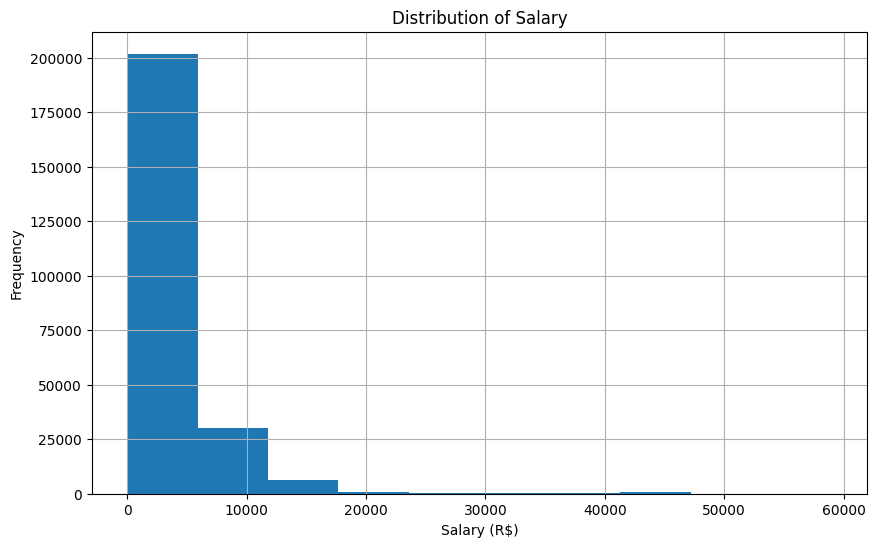

In [13]:
plt.figure(figsize=(10, 6))
df['r_remuneracao'].hist(bins=10)
plt.title('Distribution of Salary')
plt.xlabel('Salary (R$)')
plt.ylabel('Frequency')
plt.show()

In [17]:
df[df['r_remuneracao'] >= 40_000]['r_cargo'].value_counts()

r_cargo
AUD FISCAL DO TESOURO ESTADUAL    654
PROCURADOR DO ESTADO              111
DELEGADO DE POLICIA CIVIL          12
JULG ADM-TRIB TES ESTADUAL          4
Name: count, dtype: int64